In [1]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
od. download("https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: subarnasutradhar
Your Kaggle Key: ··········


100%|██████████| 54.4M/54.4M [00:00<00:00, 70.6MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
import re
import itertools

In [4]:
import os
os.listdir('./sentiment-analysis-dataset')

['training.1600000.processed.noemoticon.csv',
 'train.csv',
 'testdata.manual.2009.06.14.csv',
 'test.csv']

In [5]:
df_train = pd.read_csv("/content/sentiment-analysis-dataset/train.csv",encoding= 'unicode_escape') 

In [6]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [7]:
df_train.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [8]:
df_train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
df_train.shape

(27481, 10)

In [10]:
df_test = pd.read_csv("./sentiment-analysis-dataset/test.csv",encoding= 'unicode_escape') 

In [11]:
df_test.head(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [12]:
df_test.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [13]:
df_test.shape

(4815, 9)

In [14]:
df_train['sentiment'].values

array(['neutral', 'negative', 'negative', ..., 'positive', 'positive',
       'neutral'], dtype=object)

In [15]:
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [16]:
df_train=df_train.dropna()

In [17]:
df_train.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [18]:
df_train.reset_index(inplace=True)

In [19]:
df_test=df_test.dropna()

In [20]:
df_test.shape

(3534, 9)

In [21]:
df_test.reset_index(inplace=True)

In [22]:
df_test=df_test.dropna(how='all')

In [23]:
df_test.isnull().sum()

index               0
textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [24]:
label_mapping = {
    "negative":0,
    "neutral":2,
    "positive":4
}

In [25]:
df_train["sentiment"]=df_train["sentiment"].map(label_mapping)

In [26]:
df_test["sentiment"]=df_test["sentiment"].map(label_mapping)

In [27]:
df_train.head()

,index,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",2,morning,0-20,Afghanistan,38928346,652860.0,60
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,noon,21-30,Albania,2877797,27400.0,105
2,2,088c60f138,my boss is bullying me...,bullying me,0,night,31-45,Algeria,43851044,2381740.0,18
3,3,9642c003ef,what interview! leave me alone,leave me alone,0,morning,46-60,Andorra,77265,470.0,164
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0,noon,60-70,Angola,32866272,1246700.0,26


In [28]:
df_test.head()

,index,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,0,f87dea47db,Last session of the day http://twitpic.com/67ezh,2,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,1,96d74cb729,Shanghai is also really exciting (precisely -...,4,noon,21-30,Albania,2877797.0,27400.0,105.0
2,2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,3,01082688c6,happy bday!,4,morning,46-60,Andorra,77265.0,470.0,164.0
4,4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,4,noon,60-70,Angola,32866272.0,1246700.0,26.0


Text(0.5, 1.0, 'sentiment distribution')

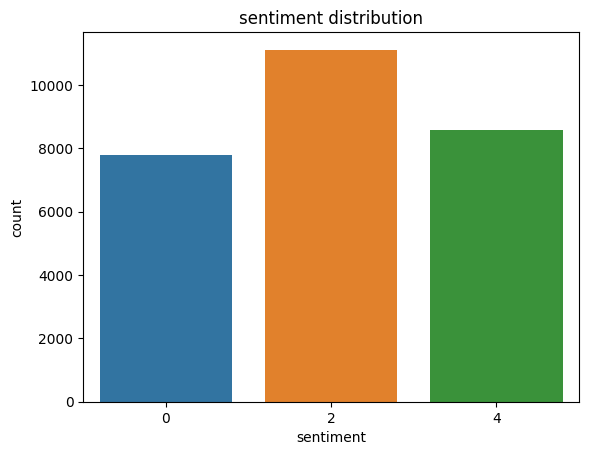

In [29]:
sns.countplot(x='sentiment',data=df_train)
plt.title("sentiment distribution")

In [30]:
X_train = df_train["text"]

In [31]:
X_test = df_test["text"]

In [32]:
X_train.head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

In [33]:
X_test.head()

0    Last session of the day  http://twitpic.com/67ezh
1     Shanghai is also really exciting (precisely -...
2    Recession hit Veronique Branquinho, she has to...
3                                          happy bday!
4               http://twitpic.com/4w75p - I like it!!
Name: text, dtype: object

In [34]:
y_train=df_train["sentiment"]

In [35]:
y_test = df_test["sentiment"]

In [36]:
y_train.head()

0    2
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [37]:
ps=PorterStemmer()

In [38]:
nltk.download('stopwords')
corpus_train=[]
for i in range(0,len(df_train)):
  rep = re.sub('[^a-zA-Z]',' ',df_train['text'][i])
  rep = rep.lower()
  rep = rep.split()

  rep = [ps.stem(word) for word in rep if not word in stopwords.words('english')]
  rep = ' '.join(rep)
  corpus_train.append(rep)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
corpus_test=[]
for i in range(0,len(df_test)):
  rep = re.sub('[^a-zA-Z]',' ',df_test['text'][i])
  rep = rep.lower()
  rep = rep.split()

  rep = [ps.stem(word) for word in rep if not word in stopwords.words('english')]
  rep = ' '.join(rep)
  corpus_test.append(rep)

In [40]:
corpus_train

['respond go',
 'sooo sad miss san diego',
 'boss bulli',
 'interview leav alon',
 'son put releas alreadi bought',
 'http www dothebounci com smf shameless plug best ranger forum earth',
 'feed babi fun smile coo',
 'soooo high',
 '',
 'journey wow u becam cooler hehe possibl',
 'much love hope reckon chanc minim p never gonna get cake stuff',
 'realli realli like song love stori taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voic',
 'test test lg env',
 'uh oh sunburn',
 'ok tri plot altern speak sigh',
 'sick past day thu hair look wierd didnt hat would look http tinyurl com mnf kw',
 'back home gonna miss everi one',
 'he',
 'oh marli sorri hope find soon',
 'play ghost onlin realli interest new updat kirin pet metamorph third job wait dragon pet',
 'clean hous famili com later today',
 'gotta restart comput thought win suppos put end constant rebooti',
 'see wat mean bout foll w friiday call lose f llower friday smh',
 'free fillin app ipod fun im addict

In [41]:
corpus_test

['last session day http twitpic com ezh',
 'shanghai also realli excit precis skyscrap galor good tweep china sh bj',
 'recess hit veroniqu branquinho quit compani shame',
 'happi bday',
 'http twitpic com w p like',
 'great weee visitor',
 'think everyon hate lol',
 'soooooo wish could im school myspac complet block',
 'within short time last clue',
 'get day alright done anyth yet leav soon stepsist though',
 'bike put hold known argh total bummer',
 'check win',
 'twitter tavern bore much',
 'va weekend youngest son turn tomorrow make kinda sad get big check twipic',
 'come socket feel like phone hole virgin loos',
 'hot today like hate new timet bad week',
 'miss',
 'cramp',
 'guy say hi answer question yesterday nice song',
 'go spiritu stagnent explod ego realis great ok',
 'stupid storm river us tonight',
 'dead grandpa pay attent',
 'need retail therapi bad ahhh gimm money geebu',
 'go sleep',
 'lame go make breakfast',
 'that cool',
 'hey peopl dont hate ground haha im sat eat

In [42]:
vect=HashingVectorizer(n_features=5000)
X_train=vect.fit_transform(corpus_train).toarray()
X_test=vect.fit_transform(corpus_test).toarray()

In [43]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
from sklearn.svm import LinearSVC

In [45]:
model = LinearSVC()

In [46]:
model.fit(X_train,y_train)

LinearSVC()

In [48]:
from sklearn import metrics

In [49]:
predictions = model.predict(X_test)
score = metrics.accuracy_score(predictions,y_test)
print(f"Accuracy: {score}")

Accuracy: 0.6745897000565931


In [50]:
matrix = metrics.confusion_matrix(y_test,predictions)

In [54]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1001
           2       0.63      0.68      0.65      1430
           4       0.74      0.70      0.72      1103

    accuracy                           0.67      3534
   macro avg       0.68      0.67      0.68      3534
weighted avg       0.68      0.67      0.68      3534



Confusion matrix, without normalization


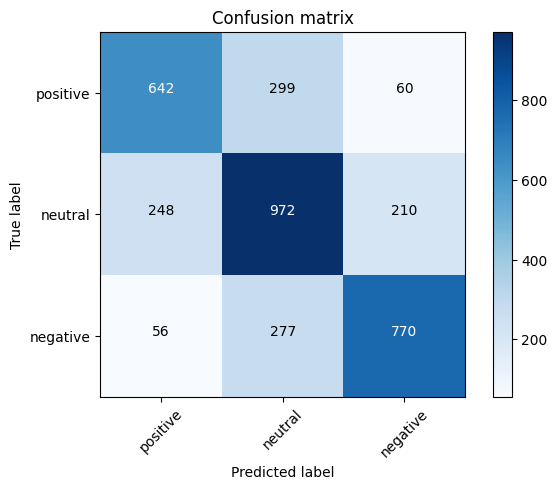

In [60]:
plot_confusion_matrix(matrix,classes=['positive','neutral','negative'])